
# **Titanic EDA And Prediction**

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [224]:
# import matplotlib
# matplotlib.use('TkAgg')  # Use the Tkinter backend (replace TkAgg with another backend if needed)

In [225]:
file1 = pd.read_csv('./Titanic.csv')

In [226]:
file1.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [227]:
file1.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [228]:
file1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## EDA

In [229]:
# Checking for duplicate values

file1.duplicated().sum()

0

In [230]:
# There are no duplicate values in the dataset.
# So, let's check for the null values in the dataset.

file1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [231]:
file1.dropna(subset=['Embarked'], inplace = True)

In [232]:
file1.shape

(889, 12)

In [233]:
file1['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 889, dtype: object

In [234]:
file1 ['Pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 889, dtype: int64

In [235]:
file1['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
E101           3
C22 C26        3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 146, dtype: int64

In [236]:
val = '''
We can observe null vaues which is greater than the 80 % or odd.
Here the This column is bring more noise to the data set. So It's better to remove this dataset. Then to fill the values with some values. 
'''

print(val)


We can observe null vaues which is greater than the 80 % or odd.
Here the This column is bring more noise to the data set. So It's better to remove this dataset. Then to fill the values with some values. 



In [237]:
## Dropping the column Cabin.

file1.drop(['Cabin'], axis = 1, inplace = True)

In [238]:
file1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [239]:
file1['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 889, dtype: float64

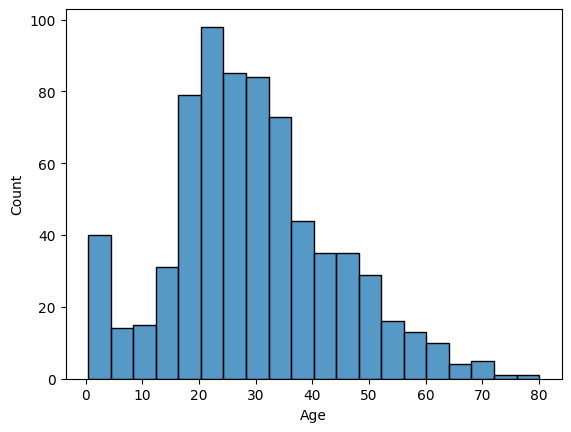

In [240]:
sns.histplot(file1['Age']) # type: ignore
plt.show()

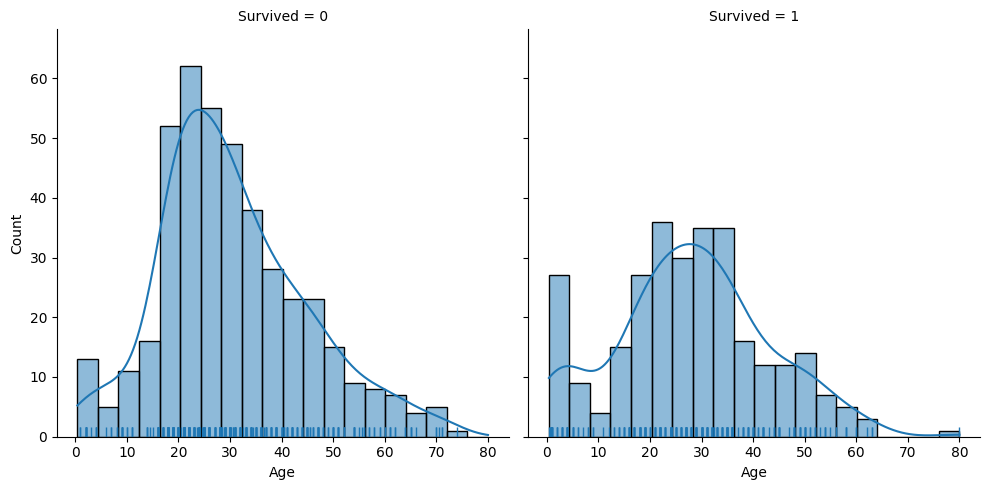

In [241]:
sns.displot(x = 'Age', data = file1, col = 'Survived', kde = True, rug = True) # type: ignore
plt.show()

In [242]:
file1['Adult'] = file1['Age'] > 18

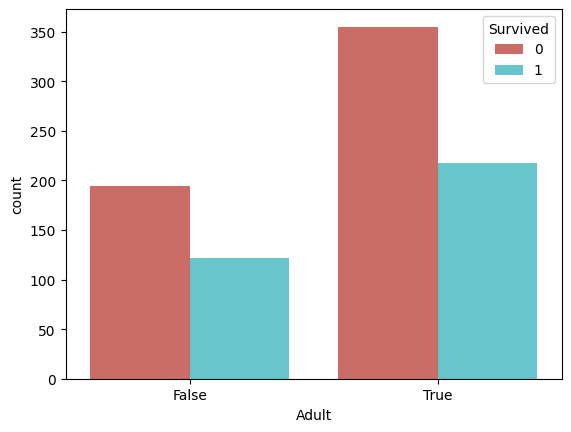

In [243]:
sns.countplot(x = 'Adult', data =file1, hue = 'Survived', palette = 'hls')
plt.show()

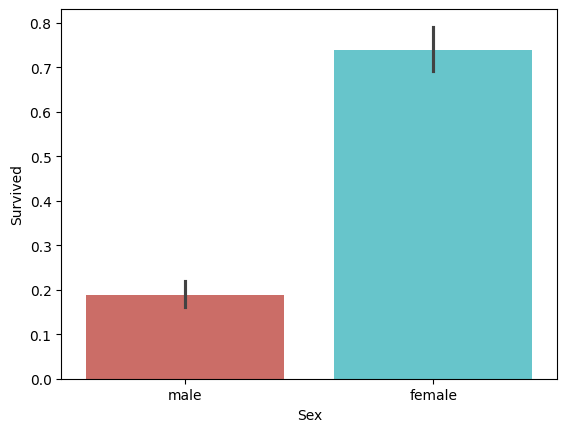

In [244]:
sns.barplot(x = 'Sex', y = 'Survived', data = file1, hue = 'Sex', palette='hls')
plt.show()

In [245]:
file1['Age'].fillna(-1, inplace=True)

In [246]:
file1[file1['Age']  == -1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Adult
5,6,0,3,"Moran, Mr. James",male,-1.0,0,0,330877,8.4583,Q,False
17,18,1,2,"Williams, Mr. Charles Eugene",male,-1.0,0,0,244373,13.0000,S,False
19,20,1,3,"Masselmani, Mrs. Fatima",female,-1.0,0,0,2649,7.2250,C,False
26,27,0,3,"Emir, Mr. Farred Chehab",male,-1.0,0,0,2631,7.2250,C,False
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,-1.0,0,0,330959,7.8792,Q,False
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,-1.0,0,0,2629,7.2292,C,False
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,-1.0,8,2,CA. 2343,69.5500,S,False
868,869,0,3,"van Melkebeke, Mr. Philemon",male,-1.0,0,0,345777,9.5000,S,False
878,879,0,3,"Laleff, Mr. Kristo",male,-1.0,0,0,349217,7.8958,S,False


In [247]:
labels = ['UnDefined', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']

bins = [-2, 0, 5, 12, 18, 24,35, 60, np.inf]


file1['AgeGroup'] = pd.cut(file1['Age'], labels=labels, bins = bins)

In [248]:
file1['AgeGroup']

0          Student
1            Adult
2      Young Adult
3      Young Adult
4      Young Adult
          ...     
886    Young Adult
887        Student
888      UnDefined
889    Young Adult
890    Young Adult
Name: AgeGroup, Length: 889, dtype: category
Categories (8, object): ['UnDefined' < 'Baby' < 'Child' < 'Teenager' < 'Student' < 'Young Adult' < 'Adult' < 'Senior']

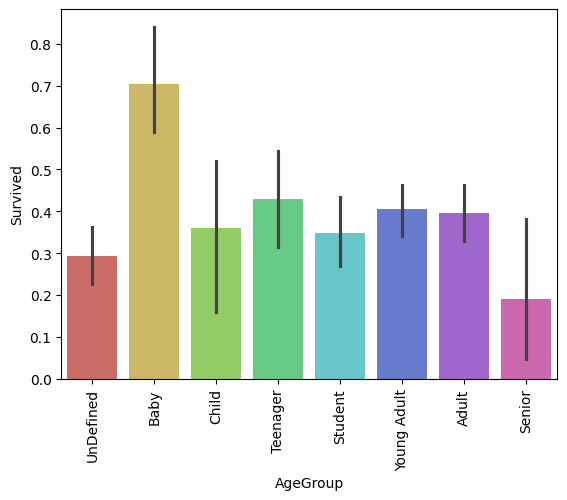

In [249]:
sns.barplot(x = 'AgeGroup', y = 'Survived', data = file1, hue = 'AgeGroup', palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

In [250]:
file1.groupby(['Sex'])['Survived'].value_counts(normalize=True)

Sex     Survived
female  1           0.740385
        0           0.259615
male    0           0.811092
        1           0.188908
Name: proportion, dtype: float64

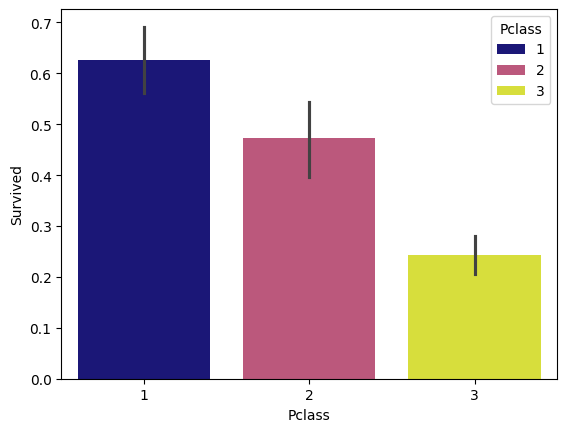

In [251]:
sns.barplot(x = 'Pclass', y = 'Survived', data = file1, hue = 'Pclass', palette = 'plasma')
plt.show()

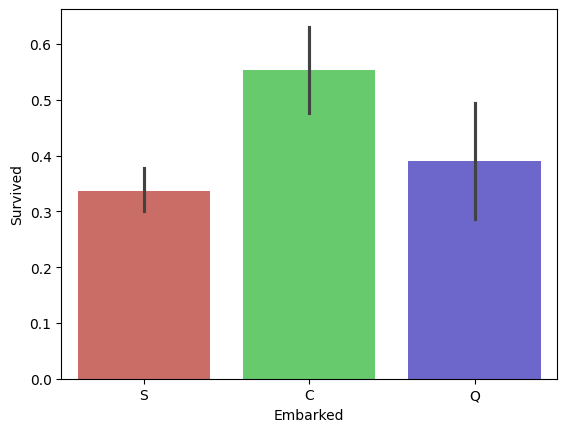

In [252]:
sns.barplot(x = 'Embarked', y = 'Survived', data =file1, hue = 'Embarked', palette = 'hls')
plt.show()

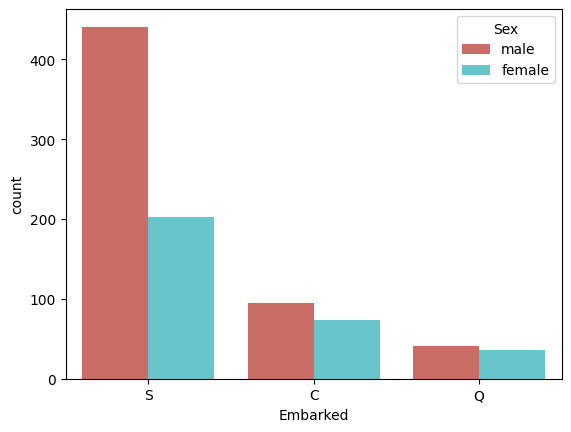

In [253]:
sns.countplot(x = 'Embarked', data = file1, hue = 'Sex', palette = 'hls')
plt.show()

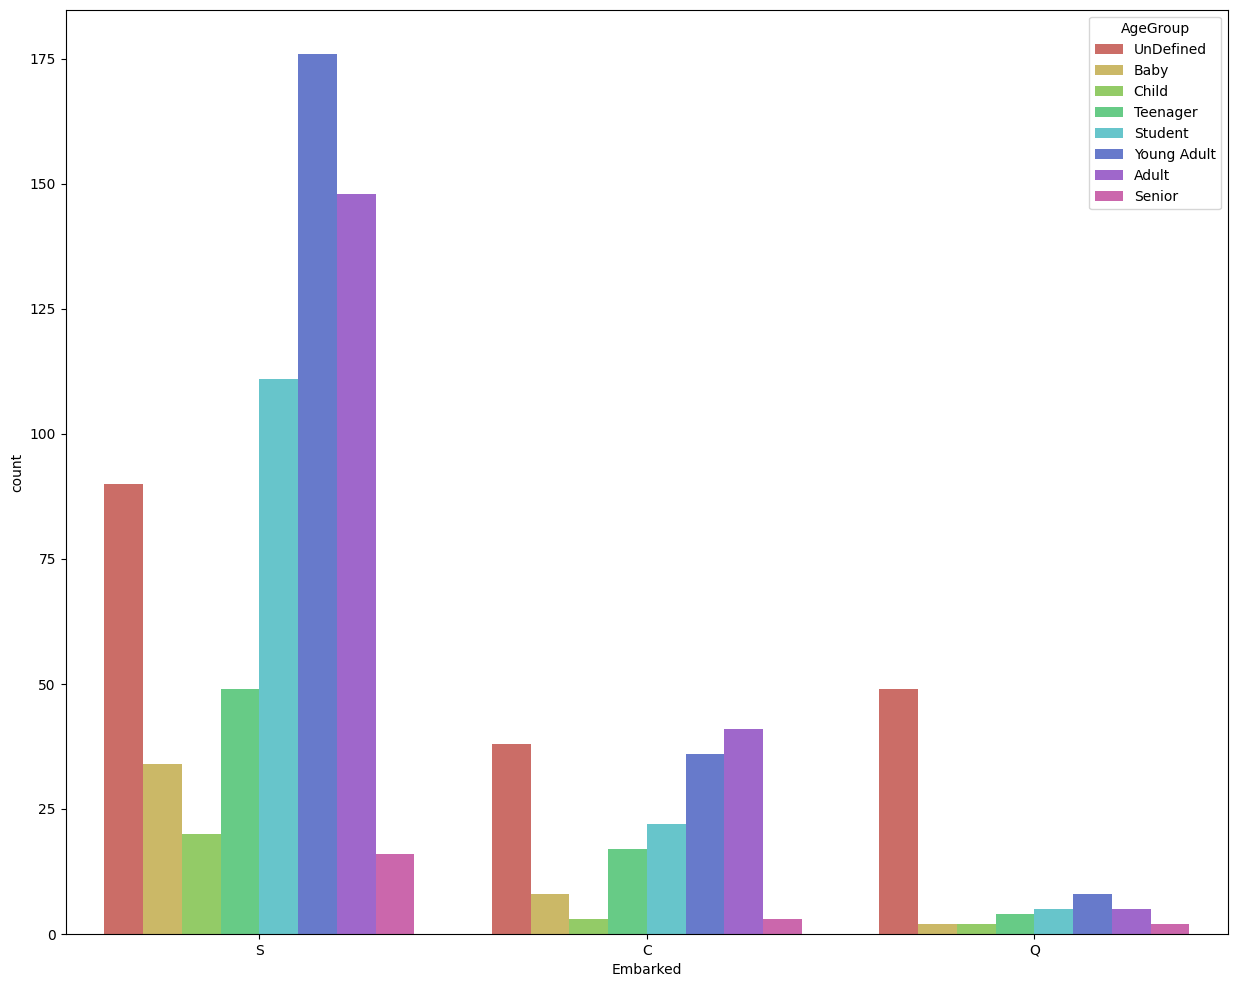

In [254]:
figure = plt.figure(figsize = (15, 12))

sns.countplot(x = 'Embarked', data = file1, hue = 'AgeGroup', palette = 'hls')
plt.show()

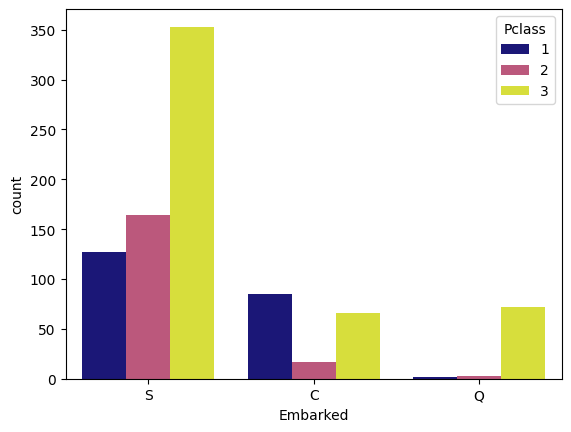

In [255]:
sns.countplot(x = 'Embarked', data = file1, hue = 'Pclass', palette = 'plasma')
plt.show()

In [256]:
file1.groupby(['Pclass'])['Embarked'].value_counts()

Pclass  Embarked
1       S           127
        C            85
        Q             2
2       S           164
        C            17
        Q             3
3       S           353
        Q            72
        C            66
Name: count, dtype: int64

In [257]:
file1.groupby(['Embarked'])['Pclass'].value_counts()

Embarked  Pclass
C         1          85
          3          66
          2          17
Q         3          72
          2           3
          1           2
S         3         353
          2         164
          1         127
Name: count, dtype: int64

In [258]:
file1.groupby(['Embarked', 'Survived'])['Pclass'].value_counts(normalize = True)

Embarked  Survived  Pclass
C         0         3         0.546667
                    1         0.346667
                    2         0.106667
          1         1         0.634409
                    3         0.268817
                    2         0.096774
Q         0         3         0.957447
                    1         0.021277
                    2         0.021277
          1         3         0.900000
                    2         0.066667
                    1         0.033333
S         0         3         0.669789
                    2         0.206089
                    1         0.124122
          1         2         0.350230
                    1         0.341014
                    3         0.308756
Name: proportion, dtype: float64

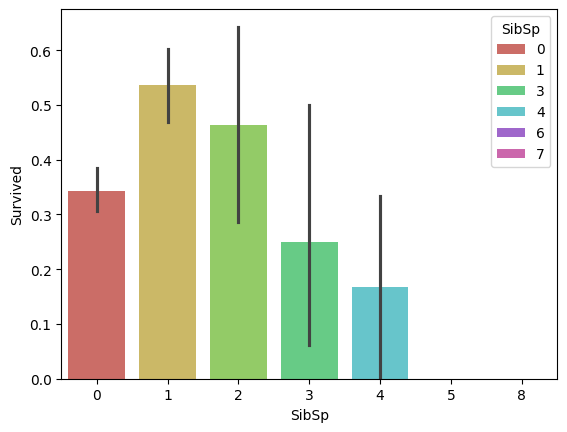

In [259]:
sns.barplot(x = 'SibSp', y = 'Survived', data = file1, hue = 'SibSp', palette = 'hls')
plt.show()

### Dropping the unnecessary columns in the dataset.

In [260]:
file1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Adult', 'AgeGroup'],
      dtype='object')

In [261]:
drop_columns = ['PassengerId', 'Fare', 'Ticket']

file1.drop(drop_columns, axis = 1, inplace = True)

In [262]:
file1.drop(['Adult'], axis =1, inplace = True)

In [263]:
file1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,Student
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,Adult
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,Young Adult
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,Young Adult
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,Young Adult
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,S,Young Adult
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,S,Student
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-1.0,1,2,S,UnDefined
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,C,Young Adult


In [264]:
file1.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
AgeGroup    0
dtype: int64

In [265]:
initial_mapping = {'Countess.': 'Royal', 'Sir.': 'Royal', 'Lady.': 'Royal', 
                   'Miss.': 'Miss', 'Mrs.': 'Mrs', 'Mr.': 'Mr', 
                   'Mlle.': 'Miss', 'Ms.': 'Miss', 'Mme.': 'Mrs', 
                   'Master.': 'Master'}
file1['Initial'] = file1['Name'].str.extract('({})'.format('|'.join(initial_mapping.keys())), expand=False).map(initial_mapping).fillna('Undefined')

In [266]:
file1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Initial
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,Student,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,Adult,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,Young Adult,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,Young Adult,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,Young Adult,Mr
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,S,Young Adult,Undefined
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,S,Student,Miss
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-1.0,1,2,S,UnDefined,Miss
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,C,Young Adult,Mr


In [267]:
file1['Initial'].value_counts()

Initial
Mr           515
Miss         184
Mrs          125
Master        40
Undefined     22
Royal          3
Name: count, dtype: int64

In [268]:
file1.groupby(['Initial'], as_index=False)['Survived'].mean()

,Initial,Survived
0,Master,0.575000
1,Miss,0.701087
2,Mr,0.157282
3,Mrs,0.792000
4,Royal,1.000000
5,Undefined,0.227273


In [269]:
file1[file1['Initial'] == 'Royal']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Initial
556,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,C,Adult,Royal
599,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,C,Adult,Royal
759,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,S,Young Adult,Royal


In [270]:
file1['AgeGroup'] = np.where(file1['AgeGroup'] == 'UnDefined', np.nan, file1['AgeGroup'])

In [271]:
file1['AgeGroup'].value_counts()

AgeGroup
Young Adult    220
Adult          194
Student        138
Teenager        70
Baby            44
Child           25
Senior          21
Name: count, dtype: int64

In [272]:
mode_age_group_by_initial = file1.groupby('Initial')['AgeGroup'].apply(lambda x: x.mode().iat[0] if not x.mode().empty else None)

In [273]:
file1['AgeGroup'].isna().sum()

177

In [274]:
file1['AgeGroup'] = file1.apply(lambda row: mode_age_group_by_initial[row['Initial']] if pd.isna(row['AgeGroup']) else row['AgeGroup'], axis=1)

In [275]:
file1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Initial
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,Student,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,Adult,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,Young Adult,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,Young Adult,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,Young Adult,Mr
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,S,Young Adult,Undefined
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,S,Student,Miss
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-1.0,1,2,S,Student,Miss
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,C,Young Adult,Mr


In [276]:
file1['AgeGroup'].value_counts()

AgeGroup
Young Adult    338
Adult          213
Student        174
Teenager        70
Baby            48
Child           25
Senior          21
Name: count, dtype: int64

### Dropping the unnecessary columns

In [277]:
file1.drop(['Age', 'Name', 'Initial'], axis =1, inplace = True)

In [278]:
file1

,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup
0,0,3,male,1,0,S,Student
1,1,1,female,1,0,C,Adult
2,1,3,female,0,0,S,Young Adult
3,1,1,female,1,0,S,Young Adult
4,0,3,male,0,0,S,Young Adult
...,...,...,...,...,...,...,...
886,0,2,male,0,0,S,Young Adult
887,1,1,female,0,0,S,Student
888,0,3,female,1,2,S,Student
889,1,1,male,0,0,C,Young Adult


In [279]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

file1['AgeGroup'] = encoder.fit_transform(file1['AgeGroup'])
file1['Sex'] = encoder.fit_transform(file1['Sex'])
file1['Embarked'] = encoder.fit_transform(file1['Embarked'])

In [280]:
file1

,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup
0,0,3,1,1,0,2,4
1,1,1,0,1,0,0,0
2,1,3,0,0,0,2,6
3,1,1,0,1,0,2,6
4,0,3,1,0,0,2,6
...,...,...,...,...,...,...,...
886,0,2,1,0,0,2,6
887,1,1,0,0,0,2,4
888,0,3,0,1,2,2,4
889,1,1,1,0,0,0,6


In [281]:
X = file1.iloc[:,1:]
y = file1.iloc[:,0]

In [282]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [283]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [284]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

#### Models

In [285]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [286]:
lr = LogisticRegression(solver='liblinear')
gaussian = GaussianNB()
knn = KNeighborsClassifier(5)
svc = SVC()
tree = DecisionTreeClassifier()
forest = RandomForestClassifier(n_estimators=1000)

In [287]:
lr.fit(X_train, y_train)
gaussian.fit(X_train, y_train)
knn.fit(X_train, y_train)
svc.fit(X_train, y_train)
tree.fit(X_train, y_train)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [288]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix


# Obtain predictions for each classifier
predicted_lr = lr.predict(X_test)
predicted_gaussian = gaussian.predict(X_test)
predicted_knn = knn.predict(X_test)
predicted_svc = svc.predict(X_test)
predicted_tree = tree.predict(X_test)
predicted_forest = forest.predict(X_test)

# Accuracy
print('-'*150)
print('Accuracy'.center(150))
print('-'*150)

print("Linear Regression      : {:.4f}".format(accuracy_score(y_test, predicted_lr)))
print("Gaussian Naive Bayes   : {:.4f}".format(accuracy_score(y_test, predicted_gaussian)))
print("K-Nearest Neighbors    : {:.4f}".format(accuracy_score(y_test, predicted_knn)))
print("Support Vector Machine : {:.4f}".format(accuracy_score(y_test, predicted_svc)))
print("Decision Tree          : {:.4f}".format(accuracy_score(y_test, predicted_tree)))
print("Random Forest          : {:.4f}".format(accuracy_score(y_test, predicted_forest)))

# Precision
print('-'*150)
print('Precision'.center(150))
print('-'*150)

print("Linear Regression      : {:.4f}".format(precision_score(y_test, predicted_lr)))
print("Gaussian Naive Bayes   : {:.4f}".format(precision_score(y_test, predicted_gaussian)))
print("K-Nearest Neighbors    : {:.4f}".format(precision_score(y_test, predicted_knn)))
print("Support Vector Machine : {:.4f}".format(precision_score(y_test, predicted_svc)))
print("Decision Tree          : {:.4f}".format(precision_score(y_test, predicted_tree)))
print("Random Forest          : {:.4f}".format(precision_score(y_test, predicted_forest)))

# Recall
print('-'*150)
print('Recall'.center(150))
print('-'*150)

print("Linear Regression      : {:.4f}".format(recall_score(y_test, predicted_lr)))
print("Gaussian Naive Bayes   : {:.4f}".format(recall_score(y_test, predicted_gaussian)))
print("K-Nearest Neighbors    : {:.4f}".format(recall_score(y_test, predicted_knn)))
print("Support Vector Machine : {:.4f}".format(recall_score(y_test, predicted_svc)))
print("Decision Tree          : {:.4f}".format(recall_score(y_test, predicted_tree)))
print("Random Forest          : {:.4f}".format(recall_score(y_test, predicted_forest)))

# F1 Score
print('-'*150)
print('F1 Score'.center(150))
print('-'*150)

print("Linear Regression      : {:.4f}".format(f1_score(y_test, predicted_lr)))
print("Gaussian Naive Bayes   : {:.4f}".format(f1_score(y_test, predicted_gaussian)))
print("K-Nearest Neighbors    : {:.4f}".format(f1_score(y_test, predicted_knn)))
print("Support Vector Machine : {:.4f}".format(f1_score(y_test, predicted_svc)))
print("Decision Tree          : {:.4f}".format(f1_score(y_test, predicted_tree)))
print("Random Forest          : {:.4f}".format(f1_score(y_test, predicted_forest)))

# ROC AUC Score (Only applicable for binary classification)
print('-'*150)
print('ROC AUC Score'.center(150))
print('-'*150)

print("Linear Regression      : {:.4f}".format(roc_auc_score(y_test, predicted_lr)))
print("Gaussian Naive Bayes   : {:.4f}".format(roc_auc_score(y_test, predicted_gaussian,)))
print("K-Nearest Neighbors    : {:.4f}".format(roc_auc_score(y_test, predicted_knn)))
print("Support Vector Machine : {:.4f}".format(roc_auc_score(y_test, predicted_svc)))
print("Decision Tree          : {:.4f}".format(roc_auc_score(y_test, predicted_tree)))
print("Random Forest          : {:.4f}".format(roc_auc_score(y_test, predicted_forest)))



# Confusion Matrix
print('-'*150)
print('Confusion Matrix'.center(150))
print('-'*150)

print("Linear Regression :\n", confusion_matrix(y_test, predicted_lr))
print("Gaussian Naive Bayes :\n", confusion_matrix(y_test, predicted_gaussian))
print("K-Nearest Neighbors :\n", confusion_matrix(y_test, predicted_knn))
print("Support Vector Machine :\n", confusion_matrix(y_test, predicted_svc))
print("Decision Tree :\n", confusion_matrix(y_test, predicted_tree))
print("Random Forest :\n", confusion_matrix(y_test, predicted_forest))


------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                       Accuracy                                                                       
------------------------------------------------------------------------------------------------------------------------------------------------------
Linear Regression      : 0.8127
Gaussian Naive Bayes   : 0.7790
K-Nearest Neighbors    : 0.7828
Support Vector Machine : 0.8240
Decision Tree          : 0.8090
Random Forest          : 0.8240
------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                      Precision                                                                       
-----------------------------------------------------